In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.figure as figure
%matplotlib inline

In [2]:
from fractions import Fraction
normal_uniform = {2: Fraction(1, 36), 3: Fraction(2,36), 4: Fraction(3, 36),
                 5: Fraction(4, 36), 6: Fraction(5, 36), 7: Fraction(6, 36),
                 8: Fraction(5, 36), 9: Fraction(4, 36), 10: Fraction(3, 36),
                 11: Fraction(2, 36), 12: Fraction(1, 36)}
# biased= {2: Fraction(0, 32), 3: Fraction(3,32), 4: Fraction(3, 32),
#          5: Fraction(4, 32), 6: Fraction(4, 32), 7: Fraction(6, 32),
#          8: Fraction(3, 32), 9: Fraction(2, 32), 10: Fraction(3, 32),
#          11: Fraction(4, 32), 12: Fraction(0, 32)}
biased= {2: Fraction(1, 26), 3: Fraction(2,26), 4: Fraction(3, 26),
         5: Fraction(4, 26), 6: Fraction(5, 26), 7: Fraction(6, 26),
         8: Fraction(1, 26), 9: Fraction(1, 26), 10: Fraction(1, 26),
         11: Fraction(1, 26), 12: Fraction(1, 26)}
def update(x, priors, distributions):
    weighted = []
    for d, p in zip(distributions, priors):
        weighted.append(d[x] * p)
    total = sum(weighted)
    return list(map(lambda e: e / total, weighted))

In [3]:
priors = [.5, .5]
priors = update(3, priors, [normal_uniform, biased])
priors = update(3, priors, [normal_uniform, biased])
priors = update(4, priors, [normal_uniform, biased])
priors = update(4, priors, [normal_uniform, biased])
priors = update(4, priors, [normal_uniform, biased])
priors = update(5, priors, [normal_uniform, biased])
priors = update(5, priors, [normal_uniform, biased])
priors = update(5, priors, [normal_uniform, biased])
priors = update(5, priors, [normal_uniform, biased])
priors = update(6, priors, [normal_uniform, biased])
priors = update(6, priors, [normal_uniform, biased])
priors = update(6, priors, [normal_uniform, biased])
priors = update(6, priors, [normal_uniform, biased])
priors = update(6, priors, [normal_uniform, biased])
priors = update(7, priors, [normal_uniform, biased])
priors = update(7, priors, [normal_uniform, biased])
priors = update(7, priors, [normal_uniform, biased])
priors = update(7, priors, [normal_uniform, biased])
priors = update(7, priors, [normal_uniform, biased])
priors = update(7, priors, [normal_uniform, biased])
priors = update(8, priors, [normal_uniform, biased])
priors = update(8, priors, [normal_uniform, biased])
priors = update(8, priors, [normal_uniform, biased])
priors = update(8, priors, [normal_uniform, biased])
priors = update(8, priors, [normal_uniform, biased])
priors = update(9, priors, [normal_uniform, biased])
priors = update(9, priors, [normal_uniform, biased])
priors = update(9, priors, [normal_uniform, biased])
priors = update(9, priors, [normal_uniform, biased])
priors = update(10, priors, [normal_uniform, biased])
priors = update(10, priors, [normal_uniform, biased])
priors = update(10, priors, [normal_uniform, biased])
priors = update(11, priors, [normal_uniform, biased])
priors = update(11, priors, [normal_uniform, biased])
priors

[0.9992614896212075, 0.0007385103787924079]

The idea here is that I manually loaded a normally uniform set of dice into this model, did updates every time, found that I began to get a posterior belief that this was a normal_uniform distribution. I did this 4 times, and I ended up with a 70+% probability that this was normal uniform.

Now, I could get a different model that measured the switch point, assuming biased for a while. Or, I could build a model that was some sort of mix from bias to normal. I would need a record of a lot of games. Over 6494 games, the dice are very normally distributed. I mean, perfectly. So, if there is an introduction of bias, it's got to be because over that many games, the bias would have been normally distributed as well.

In [4]:
import random
def weighted_pick(d):
    r = random.uniform(0, sum(d.itervalues()))
    s = 0.0
    for k, w in d.iteritems():
        s += w
        if r < s: return k
    return k

In [5]:
priors = [.5, .5]
for e in xrange(100):
    x = weighted_pick(normal_uniform)
    while x < 3 or x > 11:
        x = weighted_pick(normal_uniform)
    priors = update(x, priors, [normal_uniform, biased])
priors

[0.9999987063264542, 1.2936735458075107e-06]

Since I'm not seeing stable results, I'm going to have to think about this for a while. Updates on the data, every time I see a new die rolled seems to create a bias towards normal_uniform or biased, rather than learning what the real distribution is.

I reset biased to be more different than random uniform, and got stable results both directions. I think what was happening was something that looks more like a random walk when the two distributions are hard to distinguish.

What's next is a plot on these values.

In [6]:
prior = [.5, .5]
n = 100
posteriors = []
for e in xrange(n):
    x = weighted_pick(biased)
    posterior = update(x, prior, [normal_uniform, biased])
    posteriors.append(posterior)
    prior = posterior
df = pd.DataFrame(posteriors, columns=['Normal', 'Biased'])
df['Sample'] = list(xrange(n))
df.head()

Normal    Biased  Sample
0  0.419355  0.580645       0
1  0.342799  0.657201       1
2  0.601094  0.398906       2
3  0.521139  0.478861       3
4  0.440085  0.559915       4

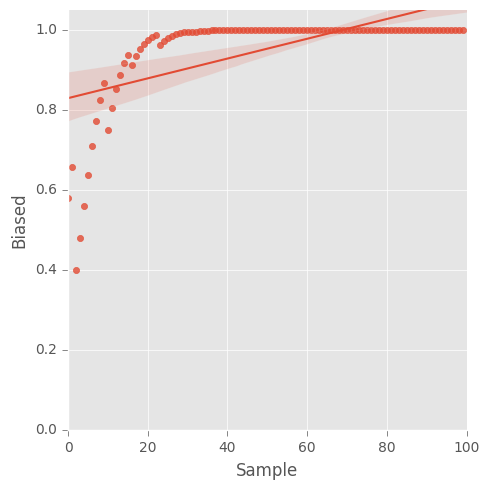

In [7]:
g = sns.lmplot(x='Sample', y='Biased', data=df)
g.set(ylim=(0,1.05))
g.set(xlim=(0,n))